### Loss Functions
They are used to calculate the loss in each iteration and train the model. The model's goal is to minimize the loss function. There are various types of loss functions that can be employed. For e.g. some of the loss functions that can be used for fitting a regression line are mean squared loss, absolute loss and pseudo-huber loss. While for classification problems we have cross entropy loss, hinge loss and KL divergence. We can use adaptive loss to figure out which type of loss function fits best for training our model. 

### Optimizers
Optimizers are used to update the parameters of our model based on the loss calculated using the loss function. There are several kinds of optimizers which have been developed on top of the basic ones starting with the most basic one - gradient descent. Some of the examples of optimizers are: Gradient Descent, Stochastic Gradient Descent (SGD), mini-Batch gradient Descent, Adagrad, Adam etc.The optimizer to be used depends on the kind of problem we are trying to solve.

# Intro to TensorFlow: Classify images of clothing

In [1]:
# import Tensorflow
import tensorflow as tf

# import the other helper libraries required
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
#complete the code below:
fashion_mnist = tf.keras.datasets.fashion_mnist

#load the data into train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 9s 2us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
#store the class names in a list
#complete the code below
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
#check the dimensions of the training data
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
#verify the number of train_lables
len(train_labels)

60000

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
#verify the number of images in test_images by checking the dimensions
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [9]:
#verify the number of images in test_labels
len(test_images)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

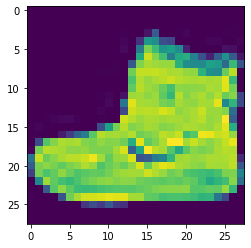

In [10]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])
plt.imshow(train_images[0])


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [11]:
#complete the code below
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, display the first 25 images from the *training set* and display the class name below each image.

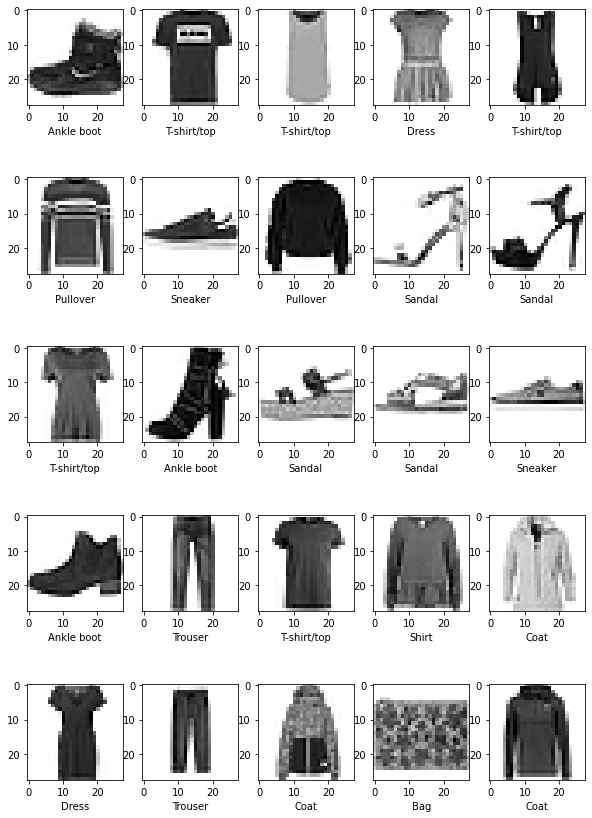

In [17]:
#write code below
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [18]:
#create a model having the layers defined below this cell

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers with a 'BatchNormalization()' layer in between the 2 dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 
The Batch Normalization layer works by performing a series of operations on the incoming input data. The set of operations involves standardization, normalization, rescaling and shifting of offset of input values coming into the BN layer.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [19]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [20]:
#write code below setting epochs=10:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5040 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8638: 0s -
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8766: 0s - loss: 0.3380 - accuracy
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2470 - accuracy: 0.9080
Epoch 10/10
1875/1875 [=======================

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset using model.evaluate():

In [21]:
#complete code below

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8857

Test accuracy: 0.885699987411499


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [22]:
#complete code below
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
#predict on the test_images using the probability_model
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [24]:
predictions[0]

array([1.6083108e-06, 1.1954909e-07, 5.2577544e-08, 2.2249522e-09,
       1.1568898e-07, 8.8213552e-03, 3.4159606e-07, 2.0803545e-02,
       5.5813185e-08, 9.7037280e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [25]:
#use np.argmax to find the highest confidence value
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [26]:
test_labels[0]

9

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
Plot should look like this:
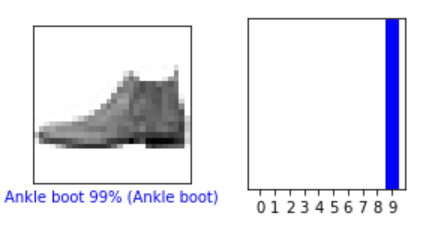

In [28]:
#plot the 0th image and next to that plot a bar graph of the predicted values for that image
#  if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

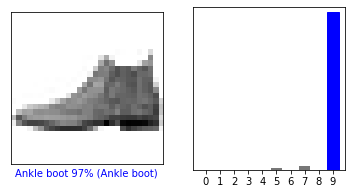

In [29]:
#plot:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Similarly plot the image and predicted values for another value in the test_images

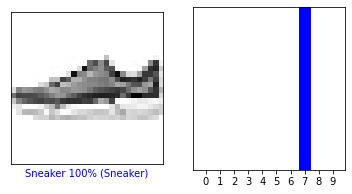

In [30]:
#write code below
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

plot several images with their predictions. Note that the model can be wrong even when very confident.

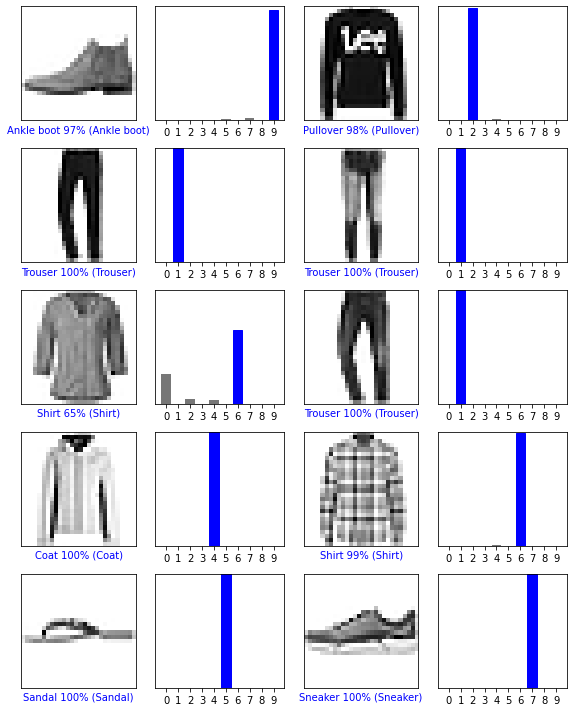

In [31]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

plt.figure(figsize=(8, 10))
for i in range(10):
  plt.subplot(5, 4, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(5, 4, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# For dynamic number of images refer solution notebook (num_rows and num_columns have been used as variables)

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [32]:
# Grab an image from the test dataset.
img = test_images[99]



`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [33]:
# Add the image to a batch where it's the only member.
#hint: use np.expand_dims
#complete code below
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [34]:
#complete code below
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3672929e-04 2.1438343e-10 8.6274564e-01 1.2935094e-05 8.5145999e-03
  3.0494780e-11 1.2859003e-01 1.8090111e-11 4.7151204e-08 4.0313503e-11]]


`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [35]:
#print the predicted class for the image

np.argmax(predictions_single[0])

2

# Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

In order to improve the performance of the model, we use different regularization techniques. There are several techniques, but we will discuss 4 main techniques.

1. L1 Regularization
2. L2 Regularization
3. Dropout
4. Batch Normalization

In [36]:
#Basic pre-processing
#we're importing the iris dataset from sklearn for our model
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) #converting output to one-hot vector
ss = StandardScaler() #standardizing the data
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=16)

In [42]:
#explore the data (X and y) however you like, (using info(), describe, graphs, etc.) and write any 4 lines on what you understood about the dataset

#Solution can be anything


And the model predicts a label as expected.

In [43]:
#model building

#run the code given below and observe the performance of this simple model having no regularization

model1 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
print(model1.summary())
model1.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])

hist1 = model1.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2560      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

1/1 [==============================] - 0s 46ms/step - loss: 0.4634 - acc: 0.8125 - mse: 0.0851 - val_loss: 0.5931 - val_acc: 0.7105 - val_mse: 0.1181
Epoch 45/150
1/1 [==============================] - 0s 47ms/step - loss: 0.4608 - acc: 0.8125 - mse: 0.0847 - val_loss: 0.5907 - val_acc: 0.7105 - val_mse: 0.1178
Epoch 46/150
1/1 [==============================] - 0s 43ms/step - loss: 0.4583 - acc: 0.8214 - mse: 0.0843 - val_loss: 0.5884 - val_acc: 0.7105 - val_mse: 0.1174
Epoch 47/150
1/1 [==============================] - 0s 37ms/step - loss: 0.4558 - acc: 0.8214 - mse: 0.0839 - val_loss: 0.5861 - val_acc: 0.7105 - val_mse: 0.1171
Epoch 48/150
1/1 [==============================] - 0s 37ms/step - loss: 0.4533 - acc: 0.8304 - mse: 0.0835 - val_loss: 0.5838 - val_acc: 0.7105 - val_mse: 0.1167
Epoch 49/150
1/1 [==============================] - 0s 47ms/step - loss: 0.4509 - acc: 0.8304 - mse: 0.0831 - val_loss: 0.5815 - val_acc: 0.7105 - val_mse: 0.1164
Epoch 50/150
1/1 [=================

1/1 [==============================] - 0s 44ms/step - loss: 0.3644 - acc: 0.8661 - mse: 0.0669 - val_loss: 0.4935 - val_acc: 0.7895 - val_mse: 0.1004
Epoch 95/150
1/1 [==============================] - 0s 47ms/step - loss: 0.3628 - acc: 0.8661 - mse: 0.0666 - val_loss: 0.4918 - val_acc: 0.7895 - val_mse: 0.1000
Epoch 96/150
1/1 [==============================] - 0s 44ms/step - loss: 0.3612 - acc: 0.8661 - mse: 0.0662 - val_loss: 0.4901 - val_acc: 0.7895 - val_mse: 0.0997
Epoch 97/150
1/1 [==============================] - 0s 39ms/step - loss: 0.3595 - acc: 0.8661 - mse: 0.0659 - val_loss: 0.4884 - val_acc: 0.7895 - val_mse: 0.0993
Epoch 98/150
1/1 [==============================] - 0s 54ms/step - loss: 0.3579 - acc: 0.8750 - mse: 0.0656 - val_loss: 0.4868 - val_acc: 0.7895 - val_mse: 0.0990
Epoch 99/150
1/1 [==============================] - 0s 51ms/step - loss: 0.3563 - acc: 0.8750 - mse: 0.0652 - val_loss: 0.4852 - val_acc: 0.7895 - val_mse: 0.0987
Epoch 100/150
1/1 [================

1/1 [==============================] - 0s 36ms/step - loss: 0.2858 - acc: 0.9196 - mse: 0.0496 - val_loss: 0.4139 - val_acc: 0.7895 - val_mse: 0.0836
Epoch 145/150
1/1 [==============================] - 0s 54ms/step - loss: 0.2843 - acc: 0.9196 - mse: 0.0493 - val_loss: 0.4125 - val_acc: 0.7895 - val_mse: 0.0834
Epoch 146/150
1/1 [==============================] - 0s 44ms/step - loss: 0.2829 - acc: 0.9286 - mse: 0.0489 - val_loss: 0.4111 - val_acc: 0.7895 - val_mse: 0.0831
Epoch 147/150
1/1 [==============================] - 0s 32ms/step - loss: 0.2814 - acc: 0.9286 - mse: 0.0486 - val_loss: 0.4097 - val_acc: 0.7895 - val_mse: 0.0828
Epoch 148/150
1/1 [==============================] - 0s 53ms/step - loss: 0.2799 - acc: 0.9286 - mse: 0.0482 - val_loss: 0.4082 - val_acc: 0.7895 - val_mse: 0.0825
Epoch 149/150
1/1 [==============================] - 0s 37ms/step - loss: 0.2783 - acc: 0.9286 - mse: 0.0479 - val_loss: 0.4068 - val_acc: 0.7895 - val_mse: 0.0822
Epoch 150/150
1/1 [===========

In [44]:
#After training the model, evaluate the model and find the  loss, accuracy and mse on the test set using the evaluate() function
#print the loss, accuracy and MSE

loss1, acc1, mse1 = model1.evaluate(X_test, y_test)
print(f"Loss is {loss1},\nAccuracy is {acc1*100},\nMSE is {mse1}")


2/2 [==============================] - 0s 3ms/step - loss: 0.4054 - acc: 0.7895 - mse: 0.0819
Loss is 0.40541765093803406,
Accuracy is 78.94737124443054,
MSE is 0.08186876773834229


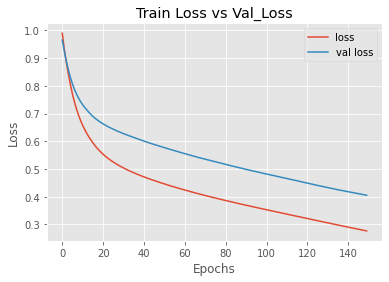

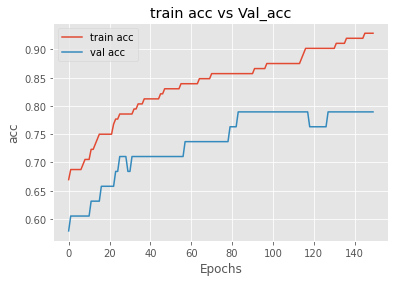

In [45]:
#Observe the plots for Validation Loss and Training Loss.

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# we observe that validation loss is increasing as compared to training loss. 
# This increase in training loss shows that our model is overfitted.

#similarly we plot for model accuracy 
plt.plot(hist1.history['acc'], label = 'train acc')
plt.plot(hist1.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#This again shows that validation accuracy is low as compared to training accuracy, which again shows signs of overfitting. 




## L1 Regularization:
 


In [46]:

#A commonly used Regularization technique is L1 regularization, also known as Lasso Regularization.

#The main concept of L1 Regularization is that we have to penalize our weights by adding absolute values of weight in our loss function, multiplied by a regularization parameter lambda λ, where λ is manually tuned to be greater than 0.



#to implement L1 regularization, create another model called model2 similar to model1, this time add an extra parameter kernel_regularizer, which we set it to ‘l1’ for L1 Regularization in the first Dense layer:

model2 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l1'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist2 = model2.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test))




Epoch 1/150
1/1 [==============================] - 1s 800ms/step - loss: 2.3201 - acc: 0.2589 - mse: 0.2474 - val_loss: 2.2426 - val_acc: 0.3421 - val_mse: 0.2301
Epoch 2/150
1/1 [==============================] - 0s 42ms/step - loss: 2.2486 - acc: 0.3571 - mse: 0.2319 - val_loss: 2.1985 - val_acc: 0.3421 - val_mse: 0.2203
Epoch 3/150
1/1 [==============================] - 0s 57ms/step - loss: 2.1887 - acc: 0.3661 - mse: 0.2185 - val_loss: 2.1633 - val_acc: 0.3947 - val_mse: 0.2125
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 2.1437 - acc: 0.4196 - mse: 0.2084 - val_loss: 2.1350 - val_acc: 0.5789 - val_mse: 0.2062
Epoch 5/150
1/1 [==============================] - 0s 164ms/step - loss: 2.1071 - acc: 0.7411 - mse: 0.2001 - val_loss: 2.1122 - val_acc: 0.6316 - val_mse: 0.2013
Epoch 6/150
1/1 [==============================] - 0s 69ms/step - loss: 2.0760 - acc: 0.7679 - mse: 0.1931 - val_loss: 2.0934 - val_acc: 0.6579 - val_mse: 0.1972
Epoch 7/150
1/1 [=========

1/1 [==============================] - 0s 44ms/step - loss: 1.5132 - acc: 0.8929 - mse: 0.0816 - val_loss: 1.6137 - val_acc: 0.7632 - val_mse: 0.1086
Epoch 52/150
1/1 [==============================] - 0s 52ms/step - loss: 1.5059 - acc: 0.8929 - mse: 0.0805 - val_loss: 1.6069 - val_acc: 0.7632 - val_mse: 0.1077
Epoch 53/150
1/1 [==============================] - 0s 37ms/step - loss: 1.4988 - acc: 0.8929 - mse: 0.0794 - val_loss: 1.6002 - val_acc: 0.7632 - val_mse: 0.1068
Epoch 54/150
1/1 [==============================] - 0s 37ms/step - loss: 1.4917 - acc: 0.8929 - mse: 0.0784 - val_loss: 1.5937 - val_acc: 0.7632 - val_mse: 0.1059
Epoch 55/150
1/1 [==============================] - 0s 36ms/step - loss: 1.4848 - acc: 0.8929 - mse: 0.0774 - val_loss: 1.5872 - val_acc: 0.7632 - val_mse: 0.1051
Epoch 56/150
1/1 [==============================] - 0s 40ms/step - loss: 1.4780 - acc: 0.8929 - mse: 0.0764 - val_loss: 1.5809 - val_acc: 0.7632 - val_mse: 0.1043
Epoch 57/150
1/1 [=================

1/1 [==============================] - 0s 33ms/step - loss: 1.2488 - acc: 0.9375 - mse: 0.0487 - val_loss: 1.3598 - val_acc: 0.7632 - val_mse: 0.0805
Epoch 102/150
1/1 [==============================] - 0s 37ms/step - loss: 1.2448 - acc: 0.9375 - mse: 0.0483 - val_loss: 1.3558 - val_acc: 0.7632 - val_mse: 0.0801
Epoch 103/150
1/1 [==============================] - 0s 34ms/step - loss: 1.2408 - acc: 0.9375 - mse: 0.0479 - val_loss: 1.3518 - val_acc: 0.7632 - val_mse: 0.0797
Epoch 104/150
1/1 [==============================] - 0s 34ms/step - loss: 1.2369 - acc: 0.9375 - mse: 0.0475 - val_loss: 1.3478 - val_acc: 0.7632 - val_mse: 0.0793
Epoch 105/150
1/1 [==============================] - 0s 41ms/step - loss: 1.2330 - acc: 0.9375 - mse: 0.0471 - val_loss: 1.3438 - val_acc: 0.7632 - val_mse: 0.0789
Epoch 106/150
1/1 [==============================] - 0s 41ms/step - loss: 1.2291 - acc: 0.9375 - mse: 0.0468 - val_loss: 1.3399 - val_acc: 0.7895 - val_mse: 0.0785
Epoch 107/150
1/1 [===========

In [47]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss2, acc2, mse2 = model2.evaluate(X_test, y_test)
print(f"Loss is {loss2},\nAccuracy is {acc2 * 100},\nMSE is {mse2}")

 


2/2 [==============================] - 0s 7ms/step - loss: 1.1866 - acc: 0.8421 - mse: 0.0639
Loss is 1.1866189241409302,
Accuracy is 84.21052694320679,
MSE is 0.06391461193561554


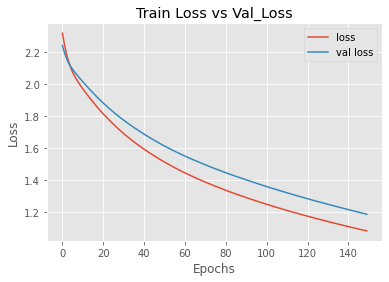

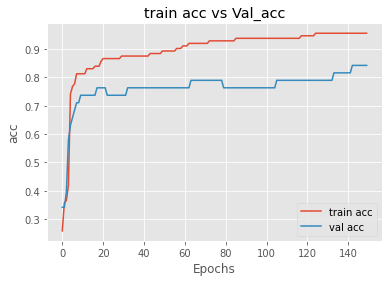

In [53]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before
plt.style.use('ggplot')
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist2.history['acc'], label = 'train acc')
plt.plot(hist2.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [50]:
# create a new model model3, similar to model1 and model2 and add l1 in more layers to check if it improves the model or not.
model3 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l1'),
    Dense(512//2, activation='tanh', kernel_regularizer='l1'),
    Dense(512//4, activation='tanh', kernel_regularizer='l1'),
    Dense(512//8, activation='tanh', kernel_regularizer='l1'),
    Dense(32, activation='relu', kernel_regularizer='l1'),
    Dense(3, activation='softmax')
])
model3.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist3 = model3.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test), verbose=2)



Epoch 1/150
1/1 - 1s - loss: 90.4866 - acc: 0.3393 - mse: 0.2510 - val_loss: 90.2388 - val_acc: 0.3947 - val_mse: 0.2365
Epoch 2/150
1/1 - 0s - loss: 90.2430 - acc: 0.3214 - mse: 0.2362 - val_loss: 90.0036 - val_acc: 0.3947 - val_mse: 0.2227
Epoch 3/150
1/1 - 0s - loss: 90.0089 - acc: 0.3125 - mse: 0.2228 - val_loss: 89.7800 - val_acc: 0.3947 - val_mse: 0.2111
Epoch 4/150
1/1 - 0s - loss: 89.7839 - acc: 0.3036 - mse: 0.2112 - val_loss: 89.5705 - val_acc: 0.6316 - val_mse: 0.2028
Epoch 5/150
1/1 - 0s - loss: 89.5704 - acc: 0.5893 - mse: 0.2021 - val_loss: 89.3655 - val_acc: 0.6579 - val_mse: 0.1953
Epoch 6/150
1/1 - 0s - loss: 89.3617 - acc: 0.7500 - mse: 0.1939 - val_loss: 89.1632 - val_acc: 0.7632 - val_mse: 0.1884
Epoch 7/150
1/1 - 0s - loss: 89.1572 - acc: 0.7857 - mse: 0.1866 - val_loss: 88.9642 - val_acc: 0.7632 - val_mse: 0.1822
Epoch 8/150
1/1 - 0s - loss: 88.9562 - acc: 0.7946 - mse: 0.1800 - val_loss: 88.7680 - val_acc: 0.7632 - val_mse: 0.1766
Epoch 9/150
1/1 - 0s - loss: 88.

Epoch 69/150
1/1 - 0s - loss: 78.2058 - acc: 0.9286 - mse: 0.0677 - val_loss: 78.1515 - val_acc: 0.7632 - val_mse: 0.0973
Epoch 70/150
1/1 - 0s - loss: 78.0406 - acc: 0.9286 - mse: 0.0671 - val_loss: 77.9872 - val_acc: 0.7632 - val_mse: 0.0969
Epoch 71/150
1/1 - 0s - loss: 77.8758 - acc: 0.9286 - mse: 0.0666 - val_loss: 77.8228 - val_acc: 0.7632 - val_mse: 0.0966
Epoch 72/150
1/1 - 0s - loss: 77.7110 - acc: 0.9286 - mse: 0.0661 - val_loss: 77.6589 - val_acc: 0.7632 - val_mse: 0.0962
Epoch 73/150
1/1 - 0s - loss: 77.5467 - acc: 0.9286 - mse: 0.0656 - val_loss: 77.4950 - val_acc: 0.7632 - val_mse: 0.0958
Epoch 74/150
1/1 - 0s - loss: 77.3824 - acc: 0.9286 - mse: 0.0650 - val_loss: 77.3315 - val_acc: 0.7632 - val_mse: 0.0955
Epoch 75/150
1/1 - 0s - loss: 77.2185 - acc: 0.9286 - mse: 0.0646 - val_loss: 77.1679 - val_acc: 0.7632 - val_mse: 0.0951
Epoch 76/150
1/1 - 0s - loss: 77.0546 - acc: 0.9286 - mse: 0.0641 - val_loss: 77.0048 - val_acc: 0.7632 - val_mse: 0.0947
Epoch 77/150
1/1 - 0s - 

Epoch 136/150
1/1 - 0s - loss: 67.6172 - acc: 0.9464 - mse: 0.0470 - val_loss: 67.5770 - val_acc: 0.7895 - val_mse: 0.0780
Epoch 137/150
1/1 - 0s - loss: 67.4661 - acc: 0.9464 - mse: 0.0468 - val_loss: 67.4258 - val_acc: 0.7895 - val_mse: 0.0778
Epoch 138/150
1/1 - 0s - loss: 67.3151 - acc: 0.9464 - mse: 0.0467 - val_loss: 67.2749 - val_acc: 0.7895 - val_mse: 0.0776
Epoch 139/150
1/1 - 0s - loss: 67.1643 - acc: 0.9464 - mse: 0.0465 - val_loss: 67.1240 - val_acc: 0.7895 - val_mse: 0.0774
Epoch 140/150
1/1 - 0s - loss: 67.0136 - acc: 0.9464 - mse: 0.0464 - val_loss: 66.9734 - val_acc: 0.7895 - val_mse: 0.0772
Epoch 141/150
1/1 - 0s - loss: 66.8632 - acc: 0.9464 - mse: 0.0462 - val_loss: 66.8230 - val_acc: 0.7895 - val_mse: 0.0770
Epoch 142/150
1/1 - 0s - loss: 66.7130 - acc: 0.9464 - mse: 0.0460 - val_loss: 66.6728 - val_acc: 0.7895 - val_mse: 0.0768
Epoch 143/150
1/1 - 0s - loss: 66.5630 - acc: 0.9464 - mse: 0.0459 - val_loss: 66.5229 - val_acc: 0.7895 - val_mse: 0.0766
Epoch 144/150
1/

In [51]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss3, acc3, mse3 = model3.evaluate(X_test, y_test)
print(f"Loss is {loss3},\nAccuracy is {acc3 * 100},\nMSE is {mse3}")

2/2 [==============================] - 0s 5ms/step - loss: 65.4782 - acc: 0.7895 - mse: 0.0752
Loss is 65.4781723022461,
Accuracy is 78.94737124443054,
MSE is 0.0752037838101387


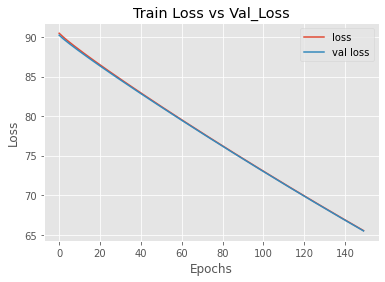

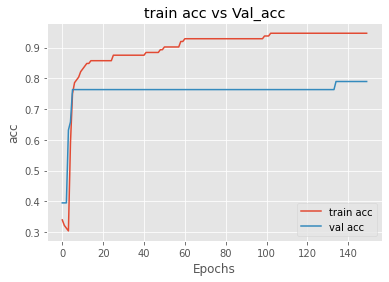

In [54]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist3.history['loss'], label = 'loss')
plt.plot(hist3.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist3.history['acc'], label = 'train acc')
plt.plot(hist3.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


## L2 Regularization


In [55]:
# L2 Regularization is another regularization technique which is also known as Ridge regularization. In L2 regularization we add the squared magnitude of weights to penalize our lost function.

#to implement L2 regularization, create another model called model4 similar to our initial basic model, this time add an extra parameter kernel_regularizer, which we set to ‘l2’ for L1 Regularization in the first Dense layer.
#compile and run the model

model4 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l2'),
    Dense(512//2, activation='tanh'),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model4.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist4 = model4.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test), verbose=2)

Epoch 1/150
1/1 - 1s - loss: 1.1475 - acc: 0.3482 - mse: 0.2173 - val_loss: 1.1065 - val_acc: 0.4474 - val_mse: 0.2074
Epoch 2/150
1/1 - 0s - loss: 1.0915 - acc: 0.5179 - mse: 0.2041 - val_loss: 1.0690 - val_acc: 0.5789 - val_mse: 0.1985
Epoch 3/150
1/1 - 0s - loss: 1.0446 - acc: 0.6607 - mse: 0.1929 - val_loss: 1.0361 - val_acc: 0.6316 - val_mse: 0.1906
Epoch 4/150
1/1 - 0s - loss: 1.0034 - acc: 0.7589 - mse: 0.1828 - val_loss: 1.0070 - val_acc: 0.6579 - val_mse: 0.1836
Epoch 5/150
1/1 - 0s - loss: 0.9671 - acc: 0.7768 - mse: 0.1739 - val_loss: 0.9807 - val_acc: 0.7632 - val_mse: 0.1773
Epoch 6/150
1/1 - 0s - loss: 0.9352 - acc: 0.7768 - mse: 0.1661 - val_loss: 0.9589 - val_acc: 0.7632 - val_mse: 0.1721
Epoch 7/150
1/1 - 0s - loss: 0.9083 - acc: 0.7946 - mse: 0.1596 - val_loss: 0.9397 - val_acc: 0.7632 - val_mse: 0.1676
Epoch 8/150
1/1 - 0s - loss: 0.8847 - acc: 0.8036 - mse: 0.1539 - val_loss: 0.9220 - val_acc: 0.7632 - val_mse: 0.1635
Epoch 9/150
1/1 - 0s - loss: 0.8630 - acc: 0.803

Epoch 70/150
1/1 - 0s - loss: 0.4350 - acc: 0.8839 - mse: 0.0608 - val_loss: 0.5580 - val_acc: 0.7632 - val_mse: 0.0962
Epoch 71/150
1/1 - 0s - loss: 0.4323 - acc: 0.8839 - mse: 0.0603 - val_loss: 0.5557 - val_acc: 0.7632 - val_mse: 0.0958
Epoch 72/150
1/1 - 0s - loss: 0.4296 - acc: 0.8839 - mse: 0.0599 - val_loss: 0.5534 - val_acc: 0.7632 - val_mse: 0.0955
Epoch 73/150
1/1 - 0s - loss: 0.4270 - acc: 0.8839 - mse: 0.0594 - val_loss: 0.5511 - val_acc: 0.7632 - val_mse: 0.0951
Epoch 74/150
1/1 - 0s - loss: 0.4244 - acc: 0.8839 - mse: 0.0589 - val_loss: 0.5489 - val_acc: 0.7632 - val_mse: 0.0948
Epoch 75/150
1/1 - 0s - loss: 0.4219 - acc: 0.8839 - mse: 0.0584 - val_loss: 0.5468 - val_acc: 0.7632 - val_mse: 0.0945
Epoch 76/150
1/1 - 0s - loss: 0.4193 - acc: 0.8929 - mse: 0.0580 - val_loss: 0.5446 - val_acc: 0.7632 - val_mse: 0.0941
Epoch 77/150
1/1 - 0s - loss: 0.4169 - acc: 0.8929 - mse: 0.0575 - val_loss: 0.5425 - val_acc: 0.7632 - val_mse: 0.0938
Epoch 78/150
1/1 - 0s - loss: 0.4144 - a

Epoch 138/150
1/1 - 0s - loss: 0.3003 - acc: 0.9554 - mse: 0.0349 - val_loss: 0.4376 - val_acc: 0.7895 - val_mse: 0.0747
Epoch 139/150
1/1 - 0s - loss: 0.2988 - acc: 0.9554 - mse: 0.0346 - val_loss: 0.4358 - val_acc: 0.7895 - val_mse: 0.0743
Epoch 140/150
1/1 - 0s - loss: 0.2974 - acc: 0.9643 - mse: 0.0343 - val_loss: 0.4341 - val_acc: 0.7895 - val_mse: 0.0739
Epoch 141/150
1/1 - 0s - loss: 0.2960 - acc: 0.9643 - mse: 0.0340 - val_loss: 0.4323 - val_acc: 0.7895 - val_mse: 0.0736
Epoch 142/150
1/1 - 0s - loss: 0.2946 - acc: 0.9643 - mse: 0.0338 - val_loss: 0.4306 - val_acc: 0.8158 - val_mse: 0.0732
Epoch 143/150
1/1 - 0s - loss: 0.2932 - acc: 0.9643 - mse: 0.0335 - val_loss: 0.4288 - val_acc: 0.8158 - val_mse: 0.0728
Epoch 144/150
1/1 - 0s - loss: 0.2918 - acc: 0.9643 - mse: 0.0332 - val_loss: 0.4271 - val_acc: 0.8158 - val_mse: 0.0725
Epoch 145/150
1/1 - 0s - loss: 0.2905 - acc: 0.9643 - mse: 0.0330 - val_loss: 0.4253 - val_acc: 0.8158 - val_mse: 0.0721
Epoch 146/150
1/1 - 0s - loss: 0

In [56]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
loss4, acc4, mse4 = model4.evaluate(X_test, y_test)
print(f"Loss is {loss4},\nAccuracy is {acc4 * 100},\nMSE is {mse4}")

2/2 [==============================] - 0s 7ms/step - loss: 0.4164 - acc: 0.8158 - mse: 0.0701
Loss is 0.4163924753665924,
Accuracy is 81.57894611358643,
MSE is 0.07010427117347717


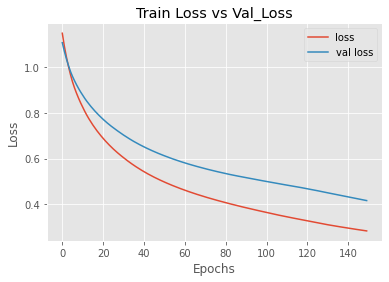

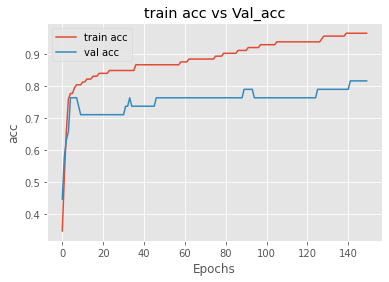

In [57]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist4.history['loss'], label = 'loss')
plt.plot(hist4.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist4.history['acc'], label = 'train acc')
plt.plot(hist4.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



In [58]:
# Now create model5 having similar to the above models having L2 in all other layers.

model5 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l2'),
    Dense(512//2, activation='tanh', kernel_regularizer='l2'),
    Dense(512//4, activation='tanh', kernel_regularizer='l2'),
    Dense(512//8, activation='tanh', kernel_regularizer='l2'),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dense(3, activation='softmax')
])
model5.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist5 = model5.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test), verbose=2)


Epoch 1/150
1/1 - 1s - loss: 7.4325 - acc: 0.7054 - mse: 0.1847 - val_loss: 7.3929 - val_acc: 0.6842 - val_mse: 0.1755
Epoch 2/150
1/1 - 0s - loss: 7.3872 - acc: 0.7946 - mse: 0.1744 - val_loss: 7.3540 - val_acc: 0.7632 - val_mse: 0.1668
Epoch 3/150
1/1 - 0s - loss: 7.3459 - acc: 0.8482 - mse: 0.1651 - val_loss: 7.3186 - val_acc: 0.7632 - val_mse: 0.1589
Epoch 4/150
1/1 - 0s - loss: 7.3072 - acc: 0.8482 - mse: 0.1563 - val_loss: 7.2873 - val_acc: 0.7368 - val_mse: 0.1521
Epoch 5/150
1/1 - 0s - loss: 7.2716 - acc: 0.8482 - mse: 0.1484 - val_loss: 7.2593 - val_acc: 0.7632 - val_mse: 0.1462
Epoch 6/150
1/1 - 0s - loss: 7.2390 - acc: 0.8304 - mse: 0.1412 - val_loss: 7.2345 - val_acc: 0.7632 - val_mse: 0.1410
Epoch 7/150
1/1 - 0s - loss: 7.2097 - acc: 0.8214 - mse: 0.1349 - val_loss: 7.2119 - val_acc: 0.7632 - val_mse: 0.1365
Epoch 8/150
1/1 - 0s - loss: 7.1826 - acc: 0.8214 - mse: 0.1291 - val_loss: 7.1916 - val_acc: 0.7632 - val_mse: 0.1326
Epoch 9/150
1/1 - 0s - loss: 7.1577 - acc: 0.857

Epoch 70/150
1/1 - 0s - loss: 6.6435 - acc: 0.9286 - mse: 0.0507 - val_loss: 6.7548 - val_acc: 0.7632 - val_mse: 0.0842
Epoch 71/150
1/1 - 0s - loss: 6.6390 - acc: 0.9375 - mse: 0.0503 - val_loss: 6.7505 - val_acc: 0.7632 - val_mse: 0.0839
Epoch 72/150
1/1 - 0s - loss: 6.6345 - acc: 0.9375 - mse: 0.0499 - val_loss: 6.7462 - val_acc: 0.7632 - val_mse: 0.0836
Epoch 73/150
1/1 - 0s - loss: 6.6301 - acc: 0.9375 - mse: 0.0495 - val_loss: 6.7419 - val_acc: 0.7632 - val_mse: 0.0832
Epoch 74/150
1/1 - 0s - loss: 6.6257 - acc: 0.9375 - mse: 0.0491 - val_loss: 6.7376 - val_acc: 0.7632 - val_mse: 0.0829
Epoch 75/150
1/1 - 0s - loss: 6.6213 - acc: 0.9375 - mse: 0.0488 - val_loss: 6.7334 - val_acc: 0.7632 - val_mse: 0.0826
Epoch 76/150
1/1 - 0s - loss: 6.6169 - acc: 0.9375 - mse: 0.0484 - val_loss: 6.7292 - val_acc: 0.7632 - val_mse: 0.0823
Epoch 77/150
1/1 - 0s - loss: 6.6126 - acc: 0.9375 - mse: 0.0480 - val_loss: 6.7250 - val_acc: 0.7632 - val_mse: 0.0820
Epoch 78/150
1/1 - 0s - loss: 6.6083 - a

Epoch 138/150
1/1 - 0s - loss: 6.3820 - acc: 0.9554 - mse: 0.0314 - val_loss: 6.4871 - val_acc: 0.8158 - val_mse: 0.0632
Epoch 139/150
1/1 - 0s - loss: 6.3786 - acc: 0.9554 - mse: 0.0312 - val_loss: 6.4834 - val_acc: 0.8158 - val_mse: 0.0629
Epoch 140/150
1/1 - 0s - loss: 6.3752 - acc: 0.9554 - mse: 0.0310 - val_loss: 6.4798 - val_acc: 0.8158 - val_mse: 0.0627
Epoch 141/150
1/1 - 0s - loss: 6.3718 - acc: 0.9554 - mse: 0.0308 - val_loss: 6.4761 - val_acc: 0.8158 - val_mse: 0.0624
Epoch 142/150
1/1 - 0s - loss: 6.3685 - acc: 0.9554 - mse: 0.0306 - val_loss: 6.4725 - val_acc: 0.8158 - val_mse: 0.0621
Epoch 143/150
1/1 - 0s - loss: 6.3651 - acc: 0.9554 - mse: 0.0304 - val_loss: 6.4689 - val_acc: 0.8421 - val_mse: 0.0618
Epoch 144/150
1/1 - 0s - loss: 6.3618 - acc: 0.9554 - mse: 0.0303 - val_loss: 6.4653 - val_acc: 0.8421 - val_mse: 0.0615
Epoch 145/150
1/1 - 0s - loss: 6.3585 - acc: 0.9554 - mse: 0.0301 - val_loss: 6.4617 - val_acc: 0.8421 - val_mse: 0.0612
Epoch 146/150
1/1 - 0s - loss: 6

In [59]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss5, acc5, mse5 = model5.evaluate(X_test, y_test)
print(f"Loss is {loss5},\nAccuracy is {acc5 * 100},\nMSE is {mse5}")

2/2 [==============================] - 0s 9ms/step - loss: 6.4437 - acc: 0.8684 - mse: 0.0598
Loss is 6.44366455078125,
Accuracy is 86.84210777282715,
MSE is 0.059781286865472794


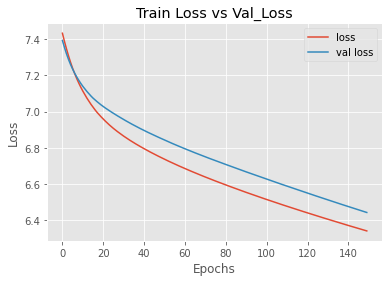

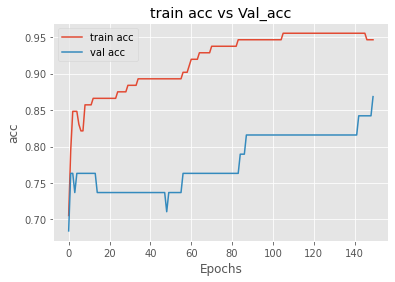

In [60]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist5.history['loss'], label = 'loss')
plt.plot(hist5.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist5.history['acc'], label = 'train acc')
plt.plot(hist5.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()




 

## Dropout
 


In [61]:

#Another common way to avoid regularization is by using the Dropout technique. The main idea behind using dropout is that we randomly turn off some neurons in our layer based on some probability.

# Create a model6 having same layers as the basic model. Add a dropout layer in this model, lets say after the 1st dense layer, and set dropout rate as 50%

model6 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    tf.keras.layers.Dropout(0.5),
    Dense(512//2, activation='tanh'),
    
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model6.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist6 = model6.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test), verbose=2)




Epoch 1/150
1/1 - 1s - loss: 1.2151 - acc: 0.1696 - mse: 0.2484 - val_loss: 1.1617 - val_acc: 0.2105 - val_mse: 0.2362
Epoch 2/150
1/1 - 0s - loss: 1.1859 - acc: 0.2054 - mse: 0.2417 - val_loss: 1.1286 - val_acc: 0.2105 - val_mse: 0.2292
Epoch 3/150
1/1 - 0s - loss: 1.1368 - acc: 0.2054 - mse: 0.2317 - val_loss: 1.0979 - val_acc: 0.2632 - val_mse: 0.2225
Epoch 4/150
1/1 - 0s - loss: 1.1130 - acc: 0.3393 - mse: 0.2264 - val_loss: 1.0672 - val_acc: 0.3421 - val_mse: 0.2156
Epoch 5/150
1/1 - 0s - loss: 1.0882 - acc: 0.3482 - mse: 0.2208 - val_loss: 1.0399 - val_acc: 0.5526 - val_mse: 0.2095
Epoch 6/150
1/1 - 0s - loss: 1.0517 - acc: 0.3929 - mse: 0.2132 - val_loss: 1.0156 - val_acc: 0.6053 - val_mse: 0.2039
Epoch 7/150
1/1 - 0s - loss: 1.0149 - acc: 0.5446 - mse: 0.2044 - val_loss: 0.9929 - val_acc: 0.6579 - val_mse: 0.1986
Epoch 8/150
1/1 - 0s - loss: 0.9892 - acc: 0.5446 - mse: 0.1986 - val_loss: 0.9719 - val_acc: 0.6316 - val_mse: 0.1936
Epoch 9/150
1/1 - 0s - loss: 0.9589 - acc: 0.580

Epoch 70/150
1/1 - 0s - loss: 0.4041 - acc: 0.8750 - mse: 0.0686 - val_loss: 0.4990 - val_acc: 0.7632 - val_mse: 0.0978
Epoch 71/150
1/1 - 0s - loss: 0.3897 - acc: 0.8929 - mse: 0.0645 - val_loss: 0.4957 - val_acc: 0.7632 - val_mse: 0.0973
Epoch 72/150
1/1 - 0s - loss: 0.3909 - acc: 0.8929 - mse: 0.0658 - val_loss: 0.4922 - val_acc: 0.7632 - val_mse: 0.0967
Epoch 73/150
1/1 - 0s - loss: 0.3868 - acc: 0.8929 - mse: 0.0650 - val_loss: 0.4896 - val_acc: 0.7632 - val_mse: 0.0964
Epoch 74/150
1/1 - 0s - loss: 0.4000 - acc: 0.8839 - mse: 0.0688 - val_loss: 0.4869 - val_acc: 0.7632 - val_mse: 0.0960
Epoch 75/150
1/1 - 0s - loss: 0.3814 - acc: 0.8750 - mse: 0.0645 - val_loss: 0.4840 - val_acc: 0.7632 - val_mse: 0.0956
Epoch 76/150
1/1 - 0s - loss: 0.3792 - acc: 0.8929 - mse: 0.0632 - val_loss: 0.4816 - val_acc: 0.7632 - val_mse: 0.0953
Epoch 77/150
1/1 - 0s - loss: 0.3741 - acc: 0.8839 - mse: 0.0625 - val_loss: 0.4787 - val_acc: 0.7632 - val_mse: 0.0948
Epoch 78/150
1/1 - 0s - loss: 0.3617 - a

Epoch 138/150
1/1 - 0s - loss: 0.2470 - acc: 0.9286 - mse: 0.0408 - val_loss: 0.3650 - val_acc: 0.7895 - val_mse: 0.0767
Epoch 139/150
1/1 - 0s - loss: 0.2359 - acc: 0.9375 - mse: 0.0381 - val_loss: 0.3633 - val_acc: 0.7895 - val_mse: 0.0764
Epoch 140/150
1/1 - 0s - loss: 0.2382 - acc: 0.9375 - mse: 0.0386 - val_loss: 0.3618 - val_acc: 0.7895 - val_mse: 0.0761
Epoch 141/150
1/1 - 0s - loss: 0.2373 - acc: 0.9375 - mse: 0.0386 - val_loss: 0.3604 - val_acc: 0.7895 - val_mse: 0.0758
Epoch 142/150
1/1 - 0s - loss: 0.2362 - acc: 0.9286 - mse: 0.0388 - val_loss: 0.3581 - val_acc: 0.7895 - val_mse: 0.0753
Epoch 143/150
1/1 - 0s - loss: 0.2306 - acc: 0.9375 - mse: 0.0371 - val_loss: 0.3563 - val_acc: 0.7895 - val_mse: 0.0750
Epoch 144/150
1/1 - 0s - loss: 0.2361 - acc: 0.9375 - mse: 0.0381 - val_loss: 0.3547 - val_acc: 0.7895 - val_mse: 0.0747
Epoch 145/150
1/1 - 0s - loss: 0.2273 - acc: 0.9464 - mse: 0.0366 - val_loss: 0.3530 - val_acc: 0.7895 - val_mse: 0.0743
Epoch 146/150
1/1 - 0s - loss: 0

In [62]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss6, acc6, mse6 = model6.evaluate(X_test, y_test)
print(f"Loss is {loss6},\nAccuracy is {acc6 * 100},\nMSE is {mse6}")

2/2 [==============================] - 0s 3ms/step - loss: 0.3471 - acc: 0.7895 - mse: 0.0733
Loss is 0.34714484214782715,
Accuracy is 78.94737124443054,
MSE is 0.07328368723392487


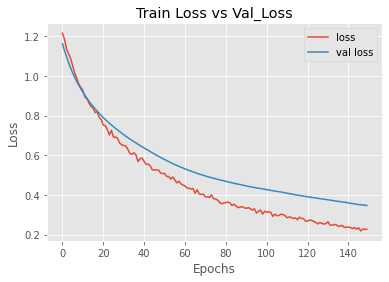

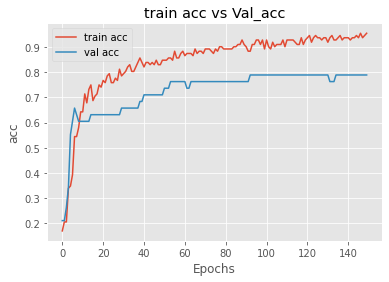

In [63]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist6.history['loss'], label = 'loss')
plt.plot(hist6.history['val_loss'], label='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist6.history['acc'], label = 'train acc')
plt.plot(hist6.history['val_acc'], label='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



In [68]:
# Create model7, having more dropout layers, having a dropout rate of your choice

model7 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    tf.keras.layers.Dropout(0.7),
    Dense(512//2, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    Dense(512//4, activation='tanh'),
    tf.keras.layers.Dropout(0.6),
    Dense(512//8, activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model7.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist7 = model7.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test,y_test), verbose=2)

Epoch 1/150
1/1 - 1s - loss: 1.1820 - acc: 0.2768 - mse: 0.2416 - val_loss: 1.1020 - val_acc: 0.2368 - val_mse: 0.2246
Epoch 2/150
1/1 - 0s - loss: 1.1388 - acc: 0.2946 - mse: 0.2317 - val_loss: 1.0722 - val_acc: 0.4737 - val_mse: 0.2171
Epoch 3/150
1/1 - 0s - loss: 1.1137 - acc: 0.3125 - mse: 0.2295 - val_loss: 1.0416 - val_acc: 0.5000 - val_mse: 0.2094
Epoch 4/150
1/1 - 0s - loss: 1.0684 - acc: 0.3839 - mse: 0.2151 - val_loss: 1.0146 - val_acc: 0.5263 - val_mse: 0.2026
Epoch 5/150
1/1 - 0s - loss: 1.1159 - acc: 0.3393 - mse: 0.2259 - val_loss: 0.9886 - val_acc: 0.5526 - val_mse: 0.1963
Epoch 6/150
1/1 - 0s - loss: 1.0581 - acc: 0.3661 - mse: 0.2123 - val_loss: 0.9640 - val_acc: 0.5526 - val_mse: 0.1902
Epoch 7/150
1/1 - 0s - loss: 1.0523 - acc: 0.4018 - mse: 0.2095 - val_loss: 0.9421 - val_acc: 0.5789 - val_mse: 0.1849
Epoch 8/150
1/1 - 0s - loss: 1.0194 - acc: 0.4554 - mse: 0.2062 - val_loss: 0.9220 - val_acc: 0.5789 - val_mse: 0.1800
Epoch 9/150
1/1 - 0s - loss: 1.0042 - acc: 0.464

Epoch 70/150
1/1 - 0s - loss: 0.4968 - acc: 0.7857 - mse: 0.0908 - val_loss: 0.4931 - val_acc: 0.7895 - val_mse: 0.1005
Epoch 71/150
1/1 - 0s - loss: 0.5636 - acc: 0.8304 - mse: 0.1050 - val_loss: 0.4904 - val_acc: 0.7895 - val_mse: 0.1001
Epoch 72/150
1/1 - 0s - loss: 0.5534 - acc: 0.7857 - mse: 0.1051 - val_loss: 0.4864 - val_acc: 0.7895 - val_mse: 0.0993
Epoch 73/150
1/1 - 0s - loss: 0.5509 - acc: 0.7857 - mse: 0.1037 - val_loss: 0.4840 - val_acc: 0.7895 - val_mse: 0.0990
Epoch 74/150
1/1 - 0s - loss: 0.4961 - acc: 0.8304 - mse: 0.0898 - val_loss: 0.4834 - val_acc: 0.7895 - val_mse: 0.0993
Epoch 75/150
1/1 - 0s - loss: 0.4777 - acc: 0.8125 - mse: 0.0880 - val_loss: 0.4819 - val_acc: 0.7895 - val_mse: 0.0992
Epoch 76/150
1/1 - 0s - loss: 0.4527 - acc: 0.8393 - mse: 0.0812 - val_loss: 0.4800 - val_acc: 0.7895 - val_mse: 0.0990
Epoch 77/150
1/1 - 0s - loss: 0.4917 - acc: 0.8482 - mse: 0.0904 - val_loss: 0.4788 - val_acc: 0.7895 - val_mse: 0.0990
Epoch 78/150
1/1 - 0s - loss: 0.5257 - a

Epoch 138/150
1/1 - 0s - loss: 0.3770 - acc: 0.8750 - mse: 0.0706 - val_loss: 0.3962 - val_acc: 0.7895 - val_mse: 0.0880
Epoch 139/150
1/1 - 0s - loss: 0.3584 - acc: 0.9018 - mse: 0.0645 - val_loss: 0.3966 - val_acc: 0.7895 - val_mse: 0.0883
Epoch 140/150
1/1 - 0s - loss: 0.3416 - acc: 0.9018 - mse: 0.0610 - val_loss: 0.3965 - val_acc: 0.7895 - val_mse: 0.0883
Epoch 141/150
1/1 - 0s - loss: 0.3400 - acc: 0.9107 - mse: 0.0611 - val_loss: 0.3959 - val_acc: 0.7895 - val_mse: 0.0883
Epoch 142/150
1/1 - 0s - loss: 0.3748 - acc: 0.8750 - mse: 0.0708 - val_loss: 0.3941 - val_acc: 0.7895 - val_mse: 0.0879
Epoch 143/150
1/1 - 0s - loss: 0.3538 - acc: 0.8929 - mse: 0.0647 - val_loss: 0.3923 - val_acc: 0.7895 - val_mse: 0.0876
Epoch 144/150
1/1 - 0s - loss: 0.3152 - acc: 0.9196 - mse: 0.0544 - val_loss: 0.3908 - val_acc: 0.7895 - val_mse: 0.0873
Epoch 145/150
1/1 - 0s - loss: 0.3881 - acc: 0.8661 - mse: 0.0730 - val_loss: 0.3886 - val_acc: 0.7895 - val_mse: 0.0868
Epoch 146/150
1/1 - 0s - loss: 0

In [69]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set
loss7, acc7, mse7 = model7.evaluate(X_test, y_test)
print(f"Loss is {loss7},\nAccuracy is {acc7 * 100},\nMSE is {mse7}")

2/2 [==============================] - 0s 3ms/step - loss: 0.3856 - acc: 0.7895 - mse: 0.0864
Loss is 0.3855534493923187,
Accuracy is 78.94737124443054,
MSE is 0.0864245817065239


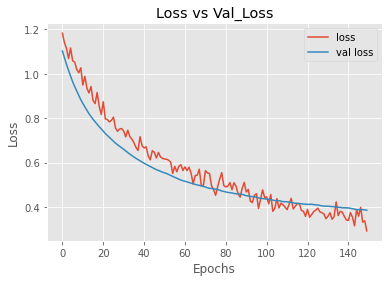

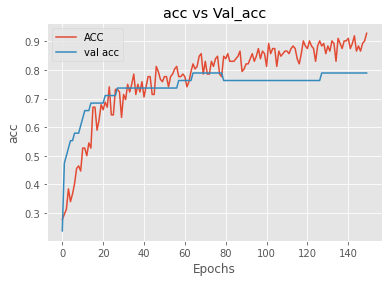

In [70]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist7.history['acc'], label = 'ACC')
plt.plot(hist7.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


## Batch Normalization


In [73]:

# The main idea behind batch normalization is that we normalize the input layer by using several techniques (sklearn.preprocessing.StandardScaler) in our case, which improves the model performance, so if the input layer is benefitted by normalization, why not normalize the hidden layers, which will improve and fasten learning even further.

# To add it in your TensorFlow model, just add tf.keras.layers.BatchNormalization() after your layers.

#Create model8, having same layers as the first model, but this time add a BatchNormalization layer after the first or second dense layer

model8 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//4, activation='tanh'),
    Dense(512//8, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model8.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist8 = model8.fit(X_train, y_train, epochs=150,  validation_data=(X_test,y_test), verbose=2)

 


Epoch 1/150
4/4 - 1s - loss: 0.9301 - acc: 0.5536 - mse: 0.1828 - val_loss: 1.0107 - val_acc: 0.6316 - val_mse: 0.2025
Epoch 2/150
4/4 - 0s - loss: 0.5886 - acc: 0.8571 - mse: 0.1047 - val_loss: 0.9183 - val_acc: 0.7105 - val_mse: 0.1804
Epoch 3/150
4/4 - 0s - loss: 0.4764 - acc: 0.8750 - mse: 0.0816 - val_loss: 0.8702 - val_acc: 0.7368 - val_mse: 0.1687
Epoch 4/150
4/4 - 0s - loss: 0.4303 - acc: 0.8571 - mse: 0.0734 - val_loss: 0.8332 - val_acc: 0.7632 - val_mse: 0.1598
Epoch 5/150
4/4 - 0s - loss: 0.3928 - acc: 0.8661 - mse: 0.0672 - val_loss: 0.8071 - val_acc: 0.7105 - val_mse: 0.1537
Epoch 6/150
4/4 - 0s - loss: 0.3477 - acc: 0.9107 - mse: 0.0577 - val_loss: 0.7845 - val_acc: 0.7105 - val_mse: 0.1483
Epoch 7/150
4/4 - 0s - loss: 0.3702 - acc: 0.8839 - mse: 0.0639 - val_loss: 0.7606 - val_acc: 0.7895 - val_mse: 0.1430
Epoch 8/150
4/4 - 0s - loss: 0.3750 - acc: 0.8571 - mse: 0.0684 - val_loss: 0.7512 - val_acc: 0.7105 - val_mse: 0.1410
Epoch 9/150
4/4 - 0s - loss: 0.3324 - acc: 0.892

Epoch 70/150
4/4 - 0s - loss: 0.1090 - acc: 0.9732 - mse: 0.0153 - val_loss: 0.3245 - val_acc: 0.8421 - val_mse: 0.0661
Epoch 71/150
4/4 - 0s - loss: 0.1846 - acc: 0.9286 - mse: 0.0364 - val_loss: 0.3173 - val_acc: 0.8684 - val_mse: 0.0641
Epoch 72/150
4/4 - 0s - loss: 0.1468 - acc: 0.9375 - mse: 0.0263 - val_loss: 0.2927 - val_acc: 0.8684 - val_mse: 0.0567
Epoch 73/150
4/4 - 0s - loss: 0.1253 - acc: 0.9643 - mse: 0.0192 - val_loss: 0.2989 - val_acc: 0.8684 - val_mse: 0.0598
Epoch 74/150
4/4 - 0s - loss: 0.1537 - acc: 0.9286 - mse: 0.0272 - val_loss: 0.3017 - val_acc: 0.8421 - val_mse: 0.0613
Epoch 75/150
4/4 - 0s - loss: 0.2737 - acc: 0.8839 - mse: 0.0556 - val_loss: 0.3011 - val_acc: 0.8421 - val_mse: 0.0617
Epoch 76/150
4/4 - 0s - loss: 0.1266 - acc: 0.9464 - mse: 0.0220 - val_loss: 0.2983 - val_acc: 0.8684 - val_mse: 0.0612
Epoch 77/150
4/4 - 0s - loss: 0.1177 - acc: 0.9554 - mse: 0.0199 - val_loss: 0.3104 - val_acc: 0.8421 - val_mse: 0.0631
Epoch 78/150
4/4 - 0s - loss: 0.1530 - a

Epoch 138/150
4/4 - 0s - loss: 0.0954 - acc: 0.9732 - mse: 0.0167 - val_loss: 0.3772 - val_acc: 0.8421 - val_mse: 0.0722
Epoch 139/150
4/4 - 0s - loss: 0.1207 - acc: 0.9464 - mse: 0.0234 - val_loss: 0.3384 - val_acc: 0.8684 - val_mse: 0.0697
Epoch 140/150
4/4 - 0s - loss: 0.1176 - acc: 0.9554 - mse: 0.0221 - val_loss: 0.3195 - val_acc: 0.8421 - val_mse: 0.0700
Epoch 141/150
4/4 - 0s - loss: 0.0585 - acc: 0.9821 - mse: 0.0074 - val_loss: 0.3460 - val_acc: 0.8421 - val_mse: 0.0736
Epoch 142/150
4/4 - 0s - loss: 0.0770 - acc: 0.9821 - mse: 0.0115 - val_loss: 0.3333 - val_acc: 0.8421 - val_mse: 0.0723
Epoch 143/150
4/4 - 0s - loss: 0.0692 - acc: 0.9732 - mse: 0.0107 - val_loss: 0.3008 - val_acc: 0.8421 - val_mse: 0.0683
Epoch 144/150
4/4 - 0s - loss: 0.0640 - acc: 0.9911 - mse: 0.0091 - val_loss: 0.3117 - val_acc: 0.8421 - val_mse: 0.0694
Epoch 145/150
4/4 - 0s - loss: 0.1313 - acc: 0.9375 - mse: 0.0266 - val_loss: 0.3051 - val_acc: 0.8421 - val_mse: 0.0671
Epoch 146/150
4/4 - 0s - loss: 0

In [74]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss8, acc8, mse8 = model8.evaluate(X_test, y_test)
print(f"Loss is {loss8},\nAccuracy is {acc8 * 100},\nMSE is {mse8}")

2/2 [==============================] - 0s 3ms/step - loss: 0.2511 - acc: 0.8684 - mse: 0.0554
Loss is 0.25105994939804077,
Accuracy is 86.84210777282715,
MSE is 0.05536714196205139


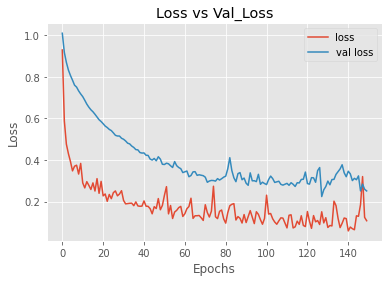

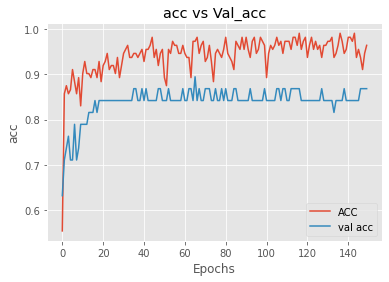

In [75]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.plot(hist8.history['loss'], label = 'loss')
plt.plot(hist8.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist8.history['acc'], label = 'ACC')
plt.plot(hist8.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [80]:
# Now create model9, having a BatchNormalization layer after each dense layer

model9 = Sequential([
    Dense(512, activation='tanh', input_shape = X_train[0].shape),
    tf.keras.layers.BatchNormalization(),
    Dense(512//2, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//4, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(512//8, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(3, activation='softmax')
])
model9.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['acc', 'mse'])
hist9 = model9.fit(X_train, y_train, epochs=150,  validation_data=(X_test,y_test), verbose=2)

Epoch 1/150
4/4 - 2s - loss: 1.2226 - acc: 0.4464 - mse: 0.2372 - val_loss: 0.8749 - val_acc: 0.7368 - val_mse: 0.1710
Epoch 2/150
4/4 - 0s - loss: 0.4761 - acc: 0.8304 - mse: 0.0849 - val_loss: 0.8591 - val_acc: 0.7368 - val_mse: 0.1676
Epoch 3/150
4/4 - 0s - loss: 0.2745 - acc: 0.8839 - mse: 0.0478 - val_loss: 0.8376 - val_acc: 0.7368 - val_mse: 0.1623
Epoch 4/150
4/4 - 0s - loss: 0.1914 - acc: 0.9554 - mse: 0.0303 - val_loss: 0.8342 - val_acc: 0.7368 - val_mse: 0.1614
Epoch 5/150
4/4 - 0s - loss: 0.2143 - acc: 0.9464 - mse: 0.0370 - val_loss: 0.8288 - val_acc: 0.7632 - val_mse: 0.1600
Epoch 6/150
4/4 - 0s - loss: 0.2183 - acc: 0.9464 - mse: 0.0385 - val_loss: 0.8085 - val_acc: 0.8158 - val_mse: 0.1558
Epoch 7/150
4/4 - 0s - loss: 0.3398 - acc: 0.8571 - mse: 0.0657 - val_loss: 0.8029 - val_acc: 0.7632 - val_mse: 0.1540
Epoch 8/150
4/4 - 0s - loss: 0.1573 - acc: 0.9732 - mse: 0.0223 - val_loss: 0.7854 - val_acc: 0.8421 - val_mse: 0.1497
Epoch 9/150
4/4 - 0s - loss: 0.1746 - acc: 0.964

Epoch 70/150
4/4 - 0s - loss: 0.0969 - acc: 0.9732 - mse: 0.0169 - val_loss: 0.7284 - val_acc: 0.7632 - val_mse: 0.1303
Epoch 71/150
4/4 - 0s - loss: 0.0742 - acc: 0.9821 - mse: 0.0093 - val_loss: 0.5859 - val_acc: 0.7632 - val_mse: 0.1123
Epoch 72/150
4/4 - 0s - loss: 0.0652 - acc: 1.0000 - mse: 0.0089 - val_loss: 0.4442 - val_acc: 0.8158 - val_mse: 0.0904
Epoch 73/150
4/4 - 0s - loss: 0.0645 - acc: 0.9911 - mse: 0.0080 - val_loss: 0.4811 - val_acc: 0.8421 - val_mse: 0.0885
Epoch 74/150
4/4 - 0s - loss: 0.0634 - acc: 0.9732 - mse: 0.0092 - val_loss: 0.4799 - val_acc: 0.8158 - val_mse: 0.0956
Epoch 75/150
4/4 - 0s - loss: 0.0730 - acc: 0.9821 - mse: 0.0111 - val_loss: 0.4933 - val_acc: 0.8158 - val_mse: 0.0920
Epoch 76/150
4/4 - 0s - loss: 0.1193 - acc: 0.9375 - mse: 0.0245 - val_loss: 0.4675 - val_acc: 0.8421 - val_mse: 0.0919
Epoch 77/150
4/4 - 0s - loss: 0.0679 - acc: 0.9732 - mse: 0.0092 - val_loss: 0.3996 - val_acc: 0.8158 - val_mse: 0.0822
Epoch 78/150
4/4 - 0s - loss: 0.0618 - a

Epoch 138/150
4/4 - 0s - loss: 0.0432 - acc: 0.9911 - mse: 0.0059 - val_loss: 0.2964 - val_acc: 0.8947 - val_mse: 0.0470
Epoch 139/150
4/4 - 0s - loss: 0.0400 - acc: 0.9911 - mse: 0.0051 - val_loss: 0.2383 - val_acc: 0.9211 - val_mse: 0.0401
Epoch 140/150
4/4 - 0s - loss: 0.0295 - acc: 0.9911 - mse: 0.0036 - val_loss: 0.2781 - val_acc: 0.9211 - val_mse: 0.0425
Epoch 141/150
4/4 - 0s - loss: 0.0334 - acc: 1.0000 - mse: 0.0033 - val_loss: 0.2670 - val_acc: 0.9211 - val_mse: 0.0410
Epoch 142/150
4/4 - 0s - loss: 0.0347 - acc: 1.0000 - mse: 0.0033 - val_loss: 0.2306 - val_acc: 0.8947 - val_mse: 0.0361
Epoch 143/150
4/4 - 0s - loss: 0.1258 - acc: 0.9554 - mse: 0.0197 - val_loss: 0.1740 - val_acc: 0.9474 - val_mse: 0.0340
Epoch 144/150
4/4 - 0s - loss: 0.0382 - acc: 0.9911 - mse: 0.0046 - val_loss: 0.1919 - val_acc: 0.9474 - val_mse: 0.0353
Epoch 145/150
4/4 - 0s - loss: 0.0476 - acc: 0.9911 - mse: 0.0073 - val_loss: 0.1979 - val_acc: 0.9474 - val_mse: 0.0383
Epoch 146/150
4/4 - 0s - loss: 0

In [81]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss9, acc9, mse9 = model9.evaluate(X_test, y_test)
print(f"Loss is {loss9},\nAccuracy is {acc9 * 100},\nMSEis {mse9}") 

2/2 [==============================] - 0s 5ms/step - loss: 0.2168 - acc: 0.9211 - mse: 0.0424
Loss is 0.21678319573402405,
Accuracy is 92.1052634716034,
MSEis 0.042352352291345596


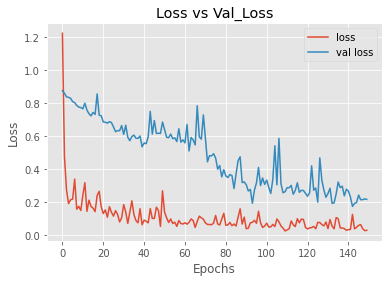

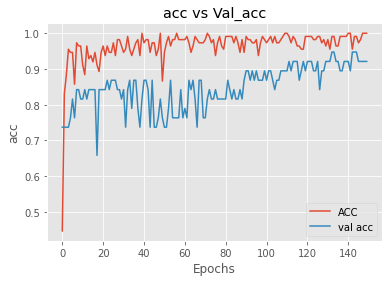

In [82]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.plot(hist9.history['loss'], label = 'loss')
plt.plot(hist9.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot for model accuracy 
plt.plot(hist9.history['acc'], label = 'ACC')
plt.plot(hist9.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

### After completing the above tasks, note down what you've understood and observed in each of the 9 models and what type of regularization works best for this dataset

-Model 1 is simple and has no regularization, dropout or batch normalization.<br />
-Model 2 has L1 regularization in the first layer and therefore a much better accuracy than model1.<br />
-Model 3 has L1 regularization in each of the layers which seems excessive as the accuracy drops down as compared to -model 2.<br />
-Model4 has L2 regularization in the first layer which makes it better than the previous model.<br />
-Model5 has L2 rgularization in all the layers which makes it the best model thus far.<br />
-Model6 instead of any regularization uses the dropout technique.<br />
-Model 7 uses dropout in all the layers but gives a similar level of accuracy as before.<br />
-Model 8 uses batch normalization in the second layer which gives as good an accuracy as the fifth model.<br />
-Model 9 has batch normalization in all the layers which makes it the best model overall giving an accuracy above 90%.<br />